### Set-up for after-training stage 

In [1]:
# import some common libraries
import numpy as np
import os, json, random
import matplotlib.pyplot as plt

output_dir = "./output/"

### Show tensorbard with statistics

In [2]:
# Look at training curves in tensorboard:
#%load_ext tensorboard
#%tensorboard --logdir output

### Plot loss curves for train and val

In [3]:
# Parse loss output to display train and val loss
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

metrics = load_json_arr(os.path.join(output_dir, "metrics.json"))
losses = ["total_loss", "loss_cls", "loss_box_reg", "loss_keypoint", "loss_rpn_cls", "loss_rpn_loc"]

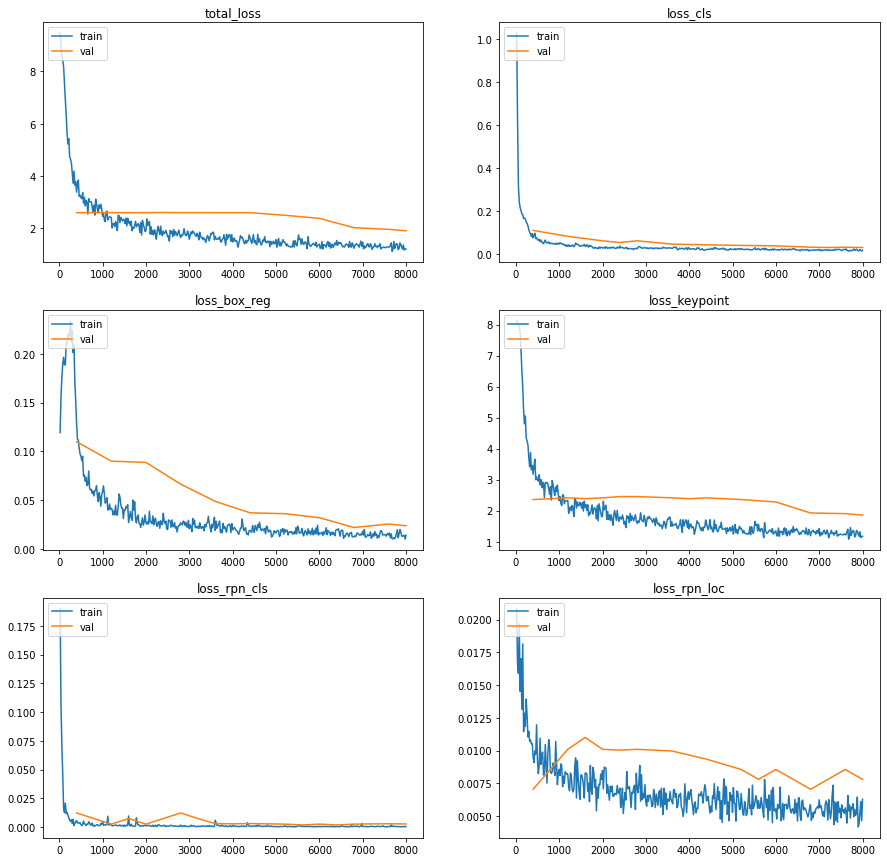

In [4]:
fig = plt.figure(figsize=(15, 15))

for idx, loss in enumerate(losses):
    fig.add_subplot(3, 2, idx+1)
        
    ax_1 = [x["iteration"] for x in metrics if loss in x]
    ax_2 = [x[loss] for x in metrics if loss in x]
    plt.plot(ax_1, ax_2)
    
    if loss == "total_loss": # needs extra handling
        val_loss = "total_val_loss"
    else:
        val_loss = "val_" + loss
        
    ax_1_val = [x["iteration"] for x in metrics if val_loss in x]
    ax_2_val = [x[val_loss] for x in metrics if val_loss in x]
    plt.plot(ax_1_val, ax_2_val)
    
    plt.title(loss)
    plt.legend(['train', 'val'], loc='upper left')
    
plt.savefig("train_val_loss.png")    
plt.show()